<h3 style="color:crimson">Artificial Intelligence - 2022-2023 Fall Semester - Nişantaşı University</h3>


## Görkem Karamolla 20202022043

### DATASET LINK  ↓ 
https://www.kaggle.com/datasets/jakeshbohaju/brain-tumor

<h2>This is a brain tumor features dataset including five first order features and eight texture features with the targt level(in the column Class). </h2>
<h1 style="color:#c71242">First order Features</h1>
        <ul>
            <li>
                <b>Mean:</b
                ><i>
                    Gives The contribution of invidual pixel intensity for the
                    image.</i
                >
            </li>
            <li>
                <b>Variance:</b
                ><i
                    >Used to find how each pixel varies from the neigbouring
                    pixel.</i
                >
            </li>
            <li>
                <b>Standard Deviation:</b
                ><i
                    >Measures the deviation of measured valeus or the data from
                    its mean</i
                >
            </li>
            <li>
                <b>Skewness:</b
                ><i
                    >Measures the symmetry, or more precisely,the lack of
                    symmetry</i
                >
            </li>
            <li>
                <b>Kurtosis:</b
                ><i
                    >Describes the peakedness of e.g. a frequency
                    distribution</i
                >
            </li>
        </ul>
<h1 style="color:#c71242">Second order Features</h1>
       <ul>
            <li>
                <b>Contrast: </b
                ><i>The difference in luminance or colour across the image.</i>
            </li>
            <li>
                <b>Energy:</b
                ><i
                    >It's the rate of change in color/brightness/magnitude of
                    the pixels over local areas.</i
                >
            </li>
            <li>
                <b>Entropy:</b
                ><i
                    >Entropy is a statistical measure of randomness that can be
                    used to characterize the texture of the image.</i
                >
            </li>
            <li>
                <b>Homogeneity:</b
                ><i
                    >Homogeneity expresses how similar certain elements (pixels)
                    of the image are.</i
                >
            </li>
            <li>
                <b>Dissimilarity:</b
                ><i
                    >Is a numerical measure of how different two data objects
                    are.</i
                >
            </li>
            <li>
                <b>Correlation:</b
                ><i
                    >Correlation is the process of moving a filter mask often
                    referred to as kernel ovr the image and computing
                    location(CNN alike).</i
                >
            </li>
            <li>
                <b>Coarseness:</b
                ><i>Describes the roughness/harshness of a texture</i>
            </li>
        </ul>
<i><b>  <p style="font-size:18px"> Image column defines the image name and Class column defines a tumor
    label (1 = Tumor, 0 = Non-Tumor)</p></b></i

In [419]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
import matplotlib as matp
import numpy as np
import cv2
import glob
from PIL import Image
import matplotlib.image as mpimg
import random
import seaborn as sns
import os as os
import shutil
from shutil import copyfile
from tqdm import tqdm
import mplcursors
from mplcursors import cursor
from tkinter import *
from mpl_toolkits.axes_grid1 import ImageGrid
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [422]:
base_dir=os.getcwd();
dataframe = pd.read_csv(base_dir+"/Brain Tumor/Brain Tumor.csv")

print(base_dir)
display(dataframe.head())
print(dataframe.shape)

C:\Users\gorke\AI PROJECT


,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


(3762, 15)


In [423]:
dataframe.describe()


,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
count,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3.762000e+03
mean,0.447368,9.488890,711.101063,25.182271,0.073603,4.102727,24.389071,127.961459,0.204705,0.058632,0.479252,4.698498,0.955767,7.458341e-155
std,0.497288,5.728022,467.466896,8.773526,0.070269,2.560940,56.434747,109.499601,0.129352,0.058300,0.127929,1.850173,0.026157,0.000000e+00
min,0.000000,0.078659,3.145628,1.773592,0.000882,1.886014,3.942402,3.194733,0.024731,0.000612,0.105490,0.681121,0.549426,7.458341e-155
25%,0.000000,4.982395,363.225459,19.058475,0.006856,2.620203,7.252852,72.125208,0.069617,0.004847,0.364973,3.412363,0.947138,7.458341e-155
50%,0.000000,8.477531,622.580417,24.951560,0.066628,3.422210,12.359088,106.737418,0.225496,0.050849,0.512551,4.482404,0.961610,7.458341e-155
75%,1.000000,13.212723,966.954319,31.095889,0.113284,4.651737,22.640304,161.059006,0.298901,0.089342,0.575557,5.723821,0.971355,7.458341e-155
max,1.000000,33.239975,2910.581879,53.949809,0.394539,36.931294,1371.640060,3382.574163,0.589682,0.347725,0.810921,27.827751,0.989972,7.458341e-155


<h2 style="color:crimson">Class Value 0 indicates no tumor on image, Class Value 1 indicates image with tumor</h2>

In [430]:
df = pd.read_csv("Brain Tumor/Brain Tumor.csv")[['Image', 'Class']]
display(df.head())
print(df.shape)

,Image,Class
0,Image1,0
1,Image2,0
2,Image3,1
3,Image4,1
4,Image5,0


(3762, 2)


<h2 style="color:crimson">Frequency Of Data on Class</h2>

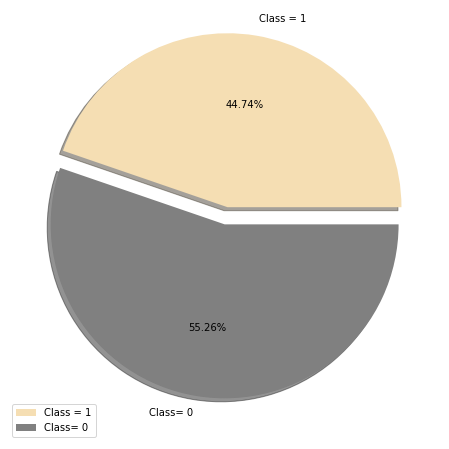

In [431]:
arr=np.array(dataframe[["Class"]]);
arr0=[]
arr1=[]
for i in arr:
    if(i==0):
        arr0.append(i)
    else:
        arr1.append(i)

plt.figure(figsize= (12, 8))
data_pie  = [len(arr1),len(arr0)]
labels = ["Class = 1", "Class= 0"]
explode = [0.1, 0]
plt.pie(data_pie ,labels= labels , explode = explode , autopct="%1.2f%%", shadow= True, colors= ['wheat', 'gray'])
plt.legend()
plt.show()

<h3 style="color:red">Scaling of the Dataset<h/3>

In [432]:
scalable=['Mean', 'Variance', 'Standard Deviation', 'Entropy',
       'Skewness', 'Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity',
       'Dissimilarity', 'Correlation', 'Coarseness']


dataframe[scalable]=StandardScaler().fit_transform(dataframe[scalable])
dataframe.describe()

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
count,3762.000000,3.762000e+03,3.762000e+03,3.762000e+03,3.762000e+03,3.762000e+03,3.762000e+03,3.762000e+03,3.762000e+03,3.762000e+03,3.762000e+03,3.762000e+03,3.762000e+03,3.762000e+03
mean,0.447368,6.731576e-17,1.034231e-16,3.018142e-16,4.308681e-18,6.657831e-17,1.671827e-17,4.621503e-17,1.442228e-16,-5.289053e-16,-8.196674e-16,6.722722e-17,4.220736e-16,-4.725695e-171
std,0.497288,1.000133e+00,1.000133e+00,1.000133e+00,1.000133e+00,1.000133e+00,1.000133e+00,1.000133e+00,1.000133e+00,1.000133e+00,1.000133e+00,1.000133e+00,1.000133e+00,0.000000e+00
min,0.000000,-1.643060e+00,-1.514652e+00,-2.668459e+00,-1.035037e+00,-8.657006e-01,-3.623545e-01,-1.139578e+00,-1.391539e+00,-9.953228e-01,-2.922023e+00,-2.171641e+00,-1.553686e+01,-1.117857e-168
25%,0.000000,-7.868500e-01,-7.442706e-01,-6.980786e-01,-9.499968e-01,-5.789751e-01,-3.036870e-01,-5.099897e-01,-1.044483e+00,-9.226728e-01,-8.934198e-01,-6.952353e-01,-3.299313e-01,-1.117857e-168
50%,0.000000,-1.765868e-01,-1.893876e-01,-2.629972e-02,-9.926889e-02,-2.657648e-01,-2.131946e-01,-1.938533e-01,1.607566e-01,-1.335147e-01,2.603295e-01,-1.168118e-01,2.234167e-01,-1.117857e-168
75%,1.000000,6.501944e-01,5.473912e-01,6.741194e-01,5.647895e-01,2.144068e-01,-3.099154e-02,3.023020e-01,7.283155e-01,5.268330e-01,7.528979e-01,5.542510e-01,5.960229e-01,-1.117857e-168
max,1.000000,4.147024e+00,4.705730e+00,3.279339e+00,4.567876e+00,1.282066e+01,2.387589e+01,2.972655e+01,2.976598e+00,4.959343e+00,2.592945e+00,1.250279e+01,1.307888e+00,1.348053e-167


<h3 style="color:crimson">Histograms for  distribution of first order features in the dataset</h3>


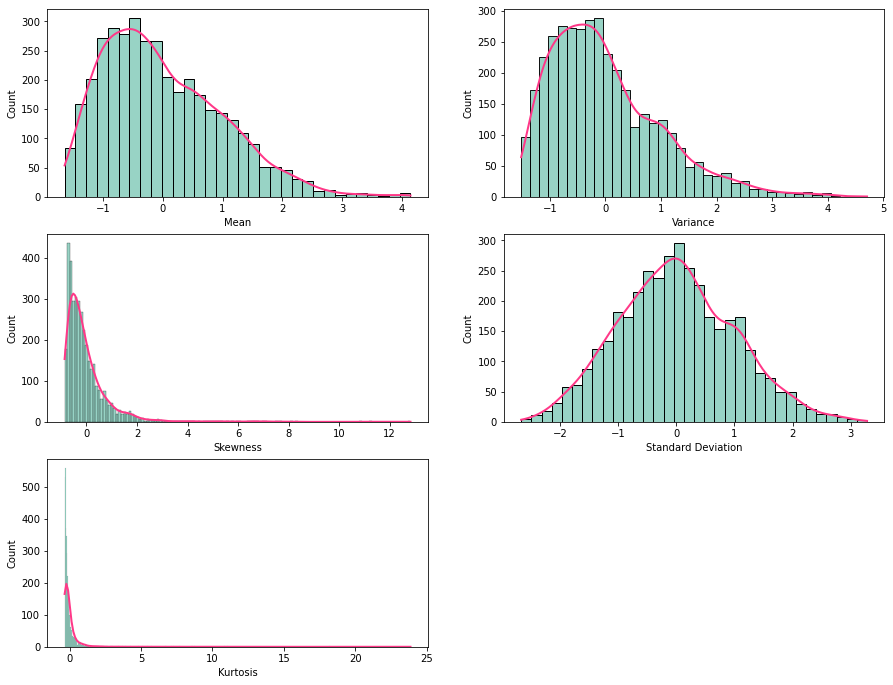

In [433]:
distplot_df=dataframe.loc[:,['Mean','Variance', 'Skewness', 'Standard Deviation', 'Kurtosis']]

fig = plt.figure(figsize=(15, 20))
for i, column in enumerate(distplot_df.columns, 1):
    f=plt.subplot(5,2,i)
    ax = sns.histplot(data=distplot_df[column], color="#32a88d",kde=True, line_kws={'color': '#a83290', 'lw': 2, });
    ax.lines[0].set_color('#ff3888')
    

<h3 style="color:crimson">Histograms for  distribution of second order features in the dataset</h3>

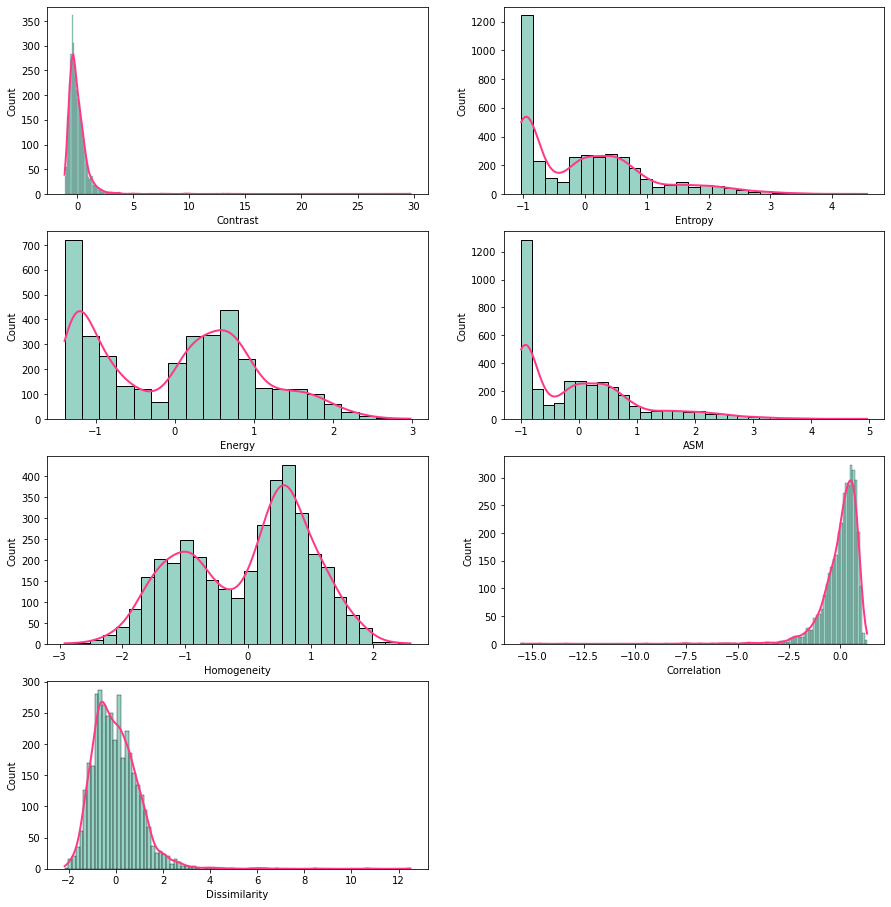

In [434]:
distplot_df=dataframe.loc[:,['Contrast','Entropy', 'Energy', 'ASM', 'Homogeneity','Correlation','Dissimilarity']]

fig = plt.figure(figsize=(15, 20))
for i, column in enumerate(distplot_df.columns, 1):
    f=plt.subplot(5,2,i)
    ax = sns.histplot(data=distplot_df[column], color="#32a88d",kde=True, line_kws={'color': 'crimson', 'lw': 2, });
    ax.lines[0].set_color('#ff3888')

    


<h3><i style="color:#76a7e3"> This <b style="color:red">Mean</b> feature it comes from the dataset itself and it is already calculated. Value shows individual pixel intensity for the entire images.</i></h3>

<AxesSubplot:xlabel='Mean'>

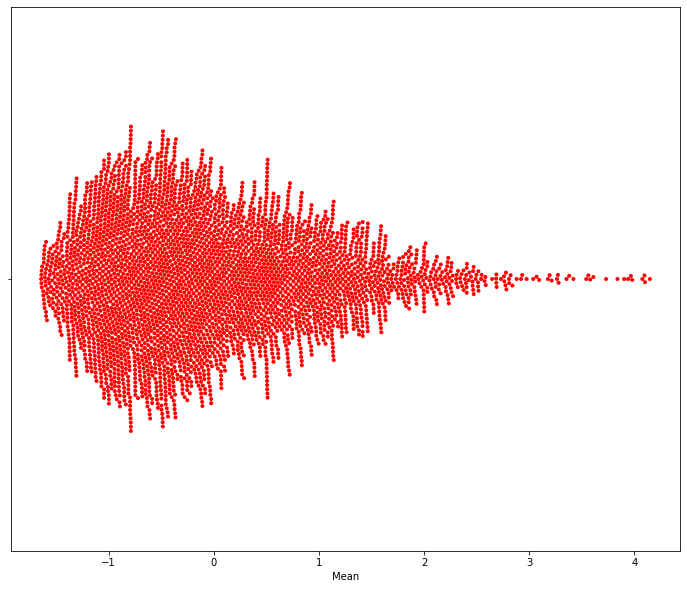

In [435]:
plt.figure(figsize=(12, 10))
sns.swarmplot(x="Mean",data=dataframe,s=4, color="red")

<h3 style="color:#76a7e3;"><i>Classification of the Data in this Figure it shows the Homogenity distribution of images with Tumor and without tumor zero means image doesn't have tumor and 1 means image has tumor</i>
</h3>

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

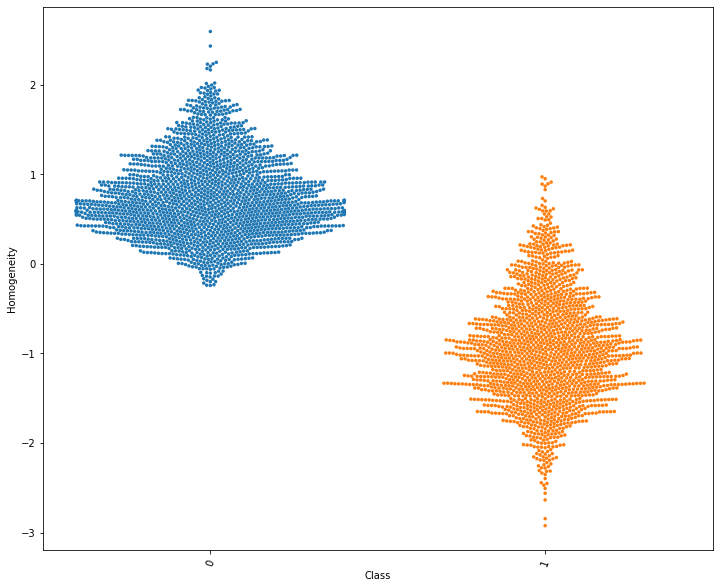

In [436]:
plt.figure(figsize=(12, 10))
sns.swarmplot(x="Class",y="Homogeneity",data=dataframe,s=3.5)
plt.xticks(rotation=70)

<h1 style="color:crimson"><i>Project Continues with making AI with Using TensorFlow and Keras</i></h3>
<h2 style="color:blue"><i>I use two models which are pre-trained and keras sequential</i></h3>
<h3 style="color:blue"><i>I used MobileNetV2 as a Pre-Trained model</i></h3>

In [437]:
def split_size(df, size):
    return int(size * len(df))


train_labels = df['Class'].values[:split_size(df, 0.8)]
train_file_names = df['Image'].values[:split_size(df, 0.8)]

val_labels = df['Class'].values[split_size(df, 0.8):split_size(df, 0.9)]
val_file_names = df['Image'].values[split_size(df, 0.8):split_size(df, 0.9)]

test_labels = df['Class'].values[split_size(df, 0.9):]
test_file_names = df['Image'].values[split_size(df, 0.9):]

In [438]:
def split_array_labels(arr_image, arr_label):
    arr_image_0 = arr_image[np.where(arr_label==0)]
    arr_image_1 = arr_image[np.where(arr_label==1)]
    return {'0':arr_image_0, '1':arr_image_1}

In [439]:
train_arr_dict = split_array_labels(train_file_names, train_labels)
val_arr_dict = split_array_labels(val_file_names, val_labels)
test_arr_dict = split_array_labels(test_file_names, test_labels)

In [440]:
def create_empty_directories(base_dir):
    check_exist_path = os.path.join(base_dir, '_MODELLING')
    if os.path.isdir(check_exist_path):
        shutil.rmtree(check_exist_path)
        print("Old directories removed")
    
    for label in ['0','1']:
        training_dir = os.path.join(base_dir, '_MODELLING', 'training', label)
        validation_dir = os.path.join(base_dir, '_MODELLING', 'validation', label)
        testing_dir = os.path.join(base_dir, '_MODELLING', 'testing', label)
        
        
        
        os.makedirs(training_dir)
        os.makedirs(validation_dir)
        os.makedirs(testing_dir)
    print(f"Created empty  training, validation and testing directories")
create_empty_directories(base_dir)

Old directories removed
Created empty  training, validation and testing directories


In [442]:
def split_data(SOURCE_DIR, train_arr_dict, val_arr_dict, test_arr_dict):
    for label in tqdm(['0','1']):
        for file_name in train_arr_dict[label]:
            file_name = f"{file_name}.jpg"
            source = os.path.join(SOURCE_DIR, file_name)
            destination = os.path.join(base_dir, '_MODELLING', 'training', label, file_name)
            copyfile(source, destination)

        for file_name in val_arr_dict[label]:
            file_name = f"{file_name}.jpg"
            source = os.path.join(SOURCE_DIR, file_name)
            destination = os.path.join(base_dir, '_MODELLING', 'validation', label, file_name)
            copyfile(source, destination)
        
        for file_name in test_arr_dict[label]:
            file_name = f"{file_name}.jpg"
            source = os.path.join(SOURCE_DIR, file_name)
            destination = os.path.join(base_dir, '_MODELLING', 'testing', label, file_name)
            copyfile(source, destination)
    print(f"Created training, validation and testing directories containing images")
    
split_data(base_dir+"\\Brain Tumor\Brain Tumor",train_arr_dict,val_arr_dict,test_arr_dict)

100%|██████████| 2/2 [00:02<00:00,  1.01s/it]

Created training, validation and testing directories containing images


In [443]:
imgExtension = ["png", "jpeg", "jpg"] 
%matplotlib inline

def chooseRandomImage(directory):
    allImages = list()
    for img in os.listdir(directory):
        ext = img.split(".")[len(img.split(".")) - 1]
        if (ext in imgExtension):
            allImages.append(img)
    imglist=[]
    labellist=[]
    for randomimg in random.sample(allImages,6):
        img=mpimg.imread(directory+randomimg)
        imglist.append(img)
        labellist.append(randomimg)
       
    
         
    fig = plt.figure(figsize=(40., 40.))
    grid = ImageGrid(fig, 111,nrows_ncols=(3, 2),axes_pad=4,
                     label_mode="2",
                     share_all=True,
                     cbar_location="right",
                     cbar_mode="each",
                     cbar_size="5%",
                     cbar_pad="5%",)

    for i,ax, img,lbl in zip(range(len(imglist)),grid, imglist,labellist):
        num= lbl.split(".")[0]
        imgNumber = int(num.split("Image")[1])
        
        ax.set_title(str(dataframe.iloc[imgNumber-1]), fontdict=None, loc='left', color = "k")
     
        
        
        lum_img = img[:, :, 0]
        ax.imshow(lum_img)
        plt.imshow(lum_img,cmap="hot")
        im=ax.imshow(lum_img,cmap=matp.colormaps['nipy_spectral'])
        grid.cbar_axes[i].colorbar(im)
        ax.cax.toggle_label(True)
        t = add_inner_title(ax, lbl, loc='lower left')
        t.patch.set_alpha(1)
plt.show()  


def add_inner_title(ax, title, loc, **kwargs):
    from matplotlib.offsetbox import AnchoredText
    from matplotlib.patheffects import withStroke
    prop = dict(path_effects=[withStroke(foreground='y', linewidth=5)],
                size=plt.rcParams['legend.fontsize'])
    at = AnchoredText(title, loc=loc, prop=prop,
                      pad=0., borderpad=0.5,
                      frameon=False, **kwargs)
    ax.add_artist(at)
    return at

<h3 style="color:darkblue"> <i>I have chosen random samples from the testing images splitted in the previous cells. I also added to the image each images columns and values also i gave cmap and extra color feature to see the tumor more clear</i></h3>

<h3 style="color:green">Random 6 Samples of Healthy Brain Images</h3>

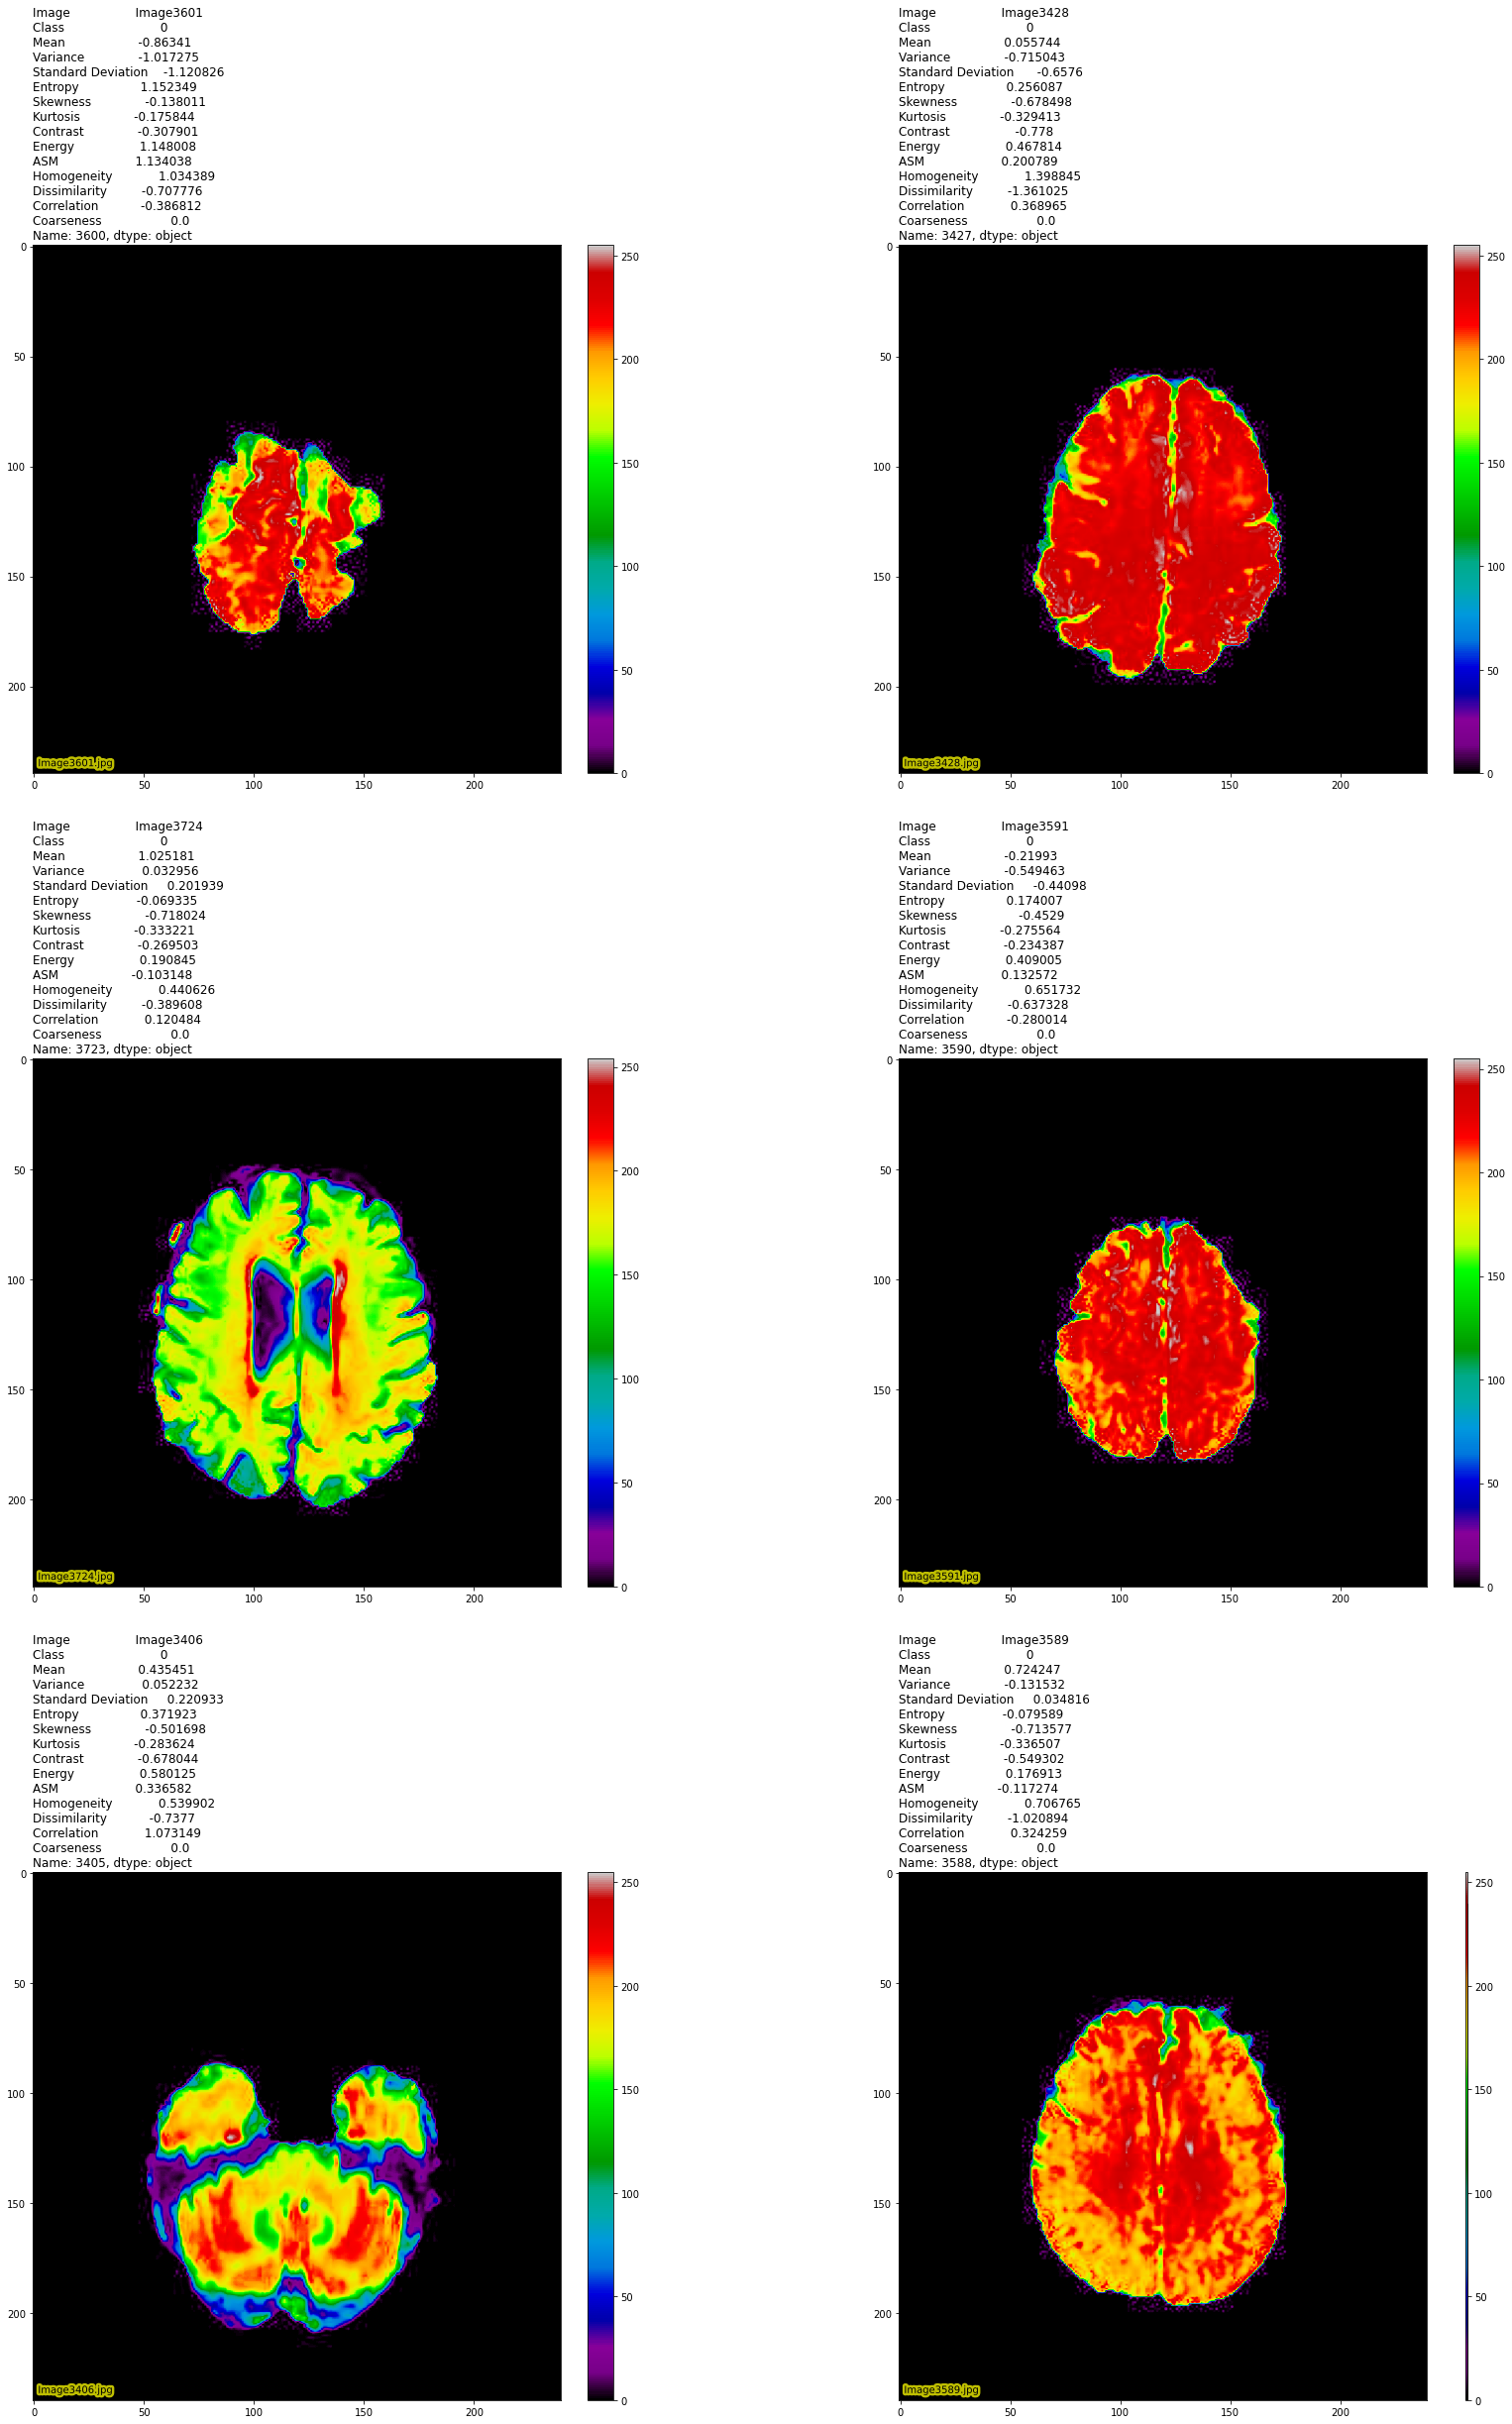

In [444]:
chooseRandomImage("_MODELLING/testing/0/")

<h3 style="color:crimson">Random 6 Samples of Brain Tumor Images</h3>

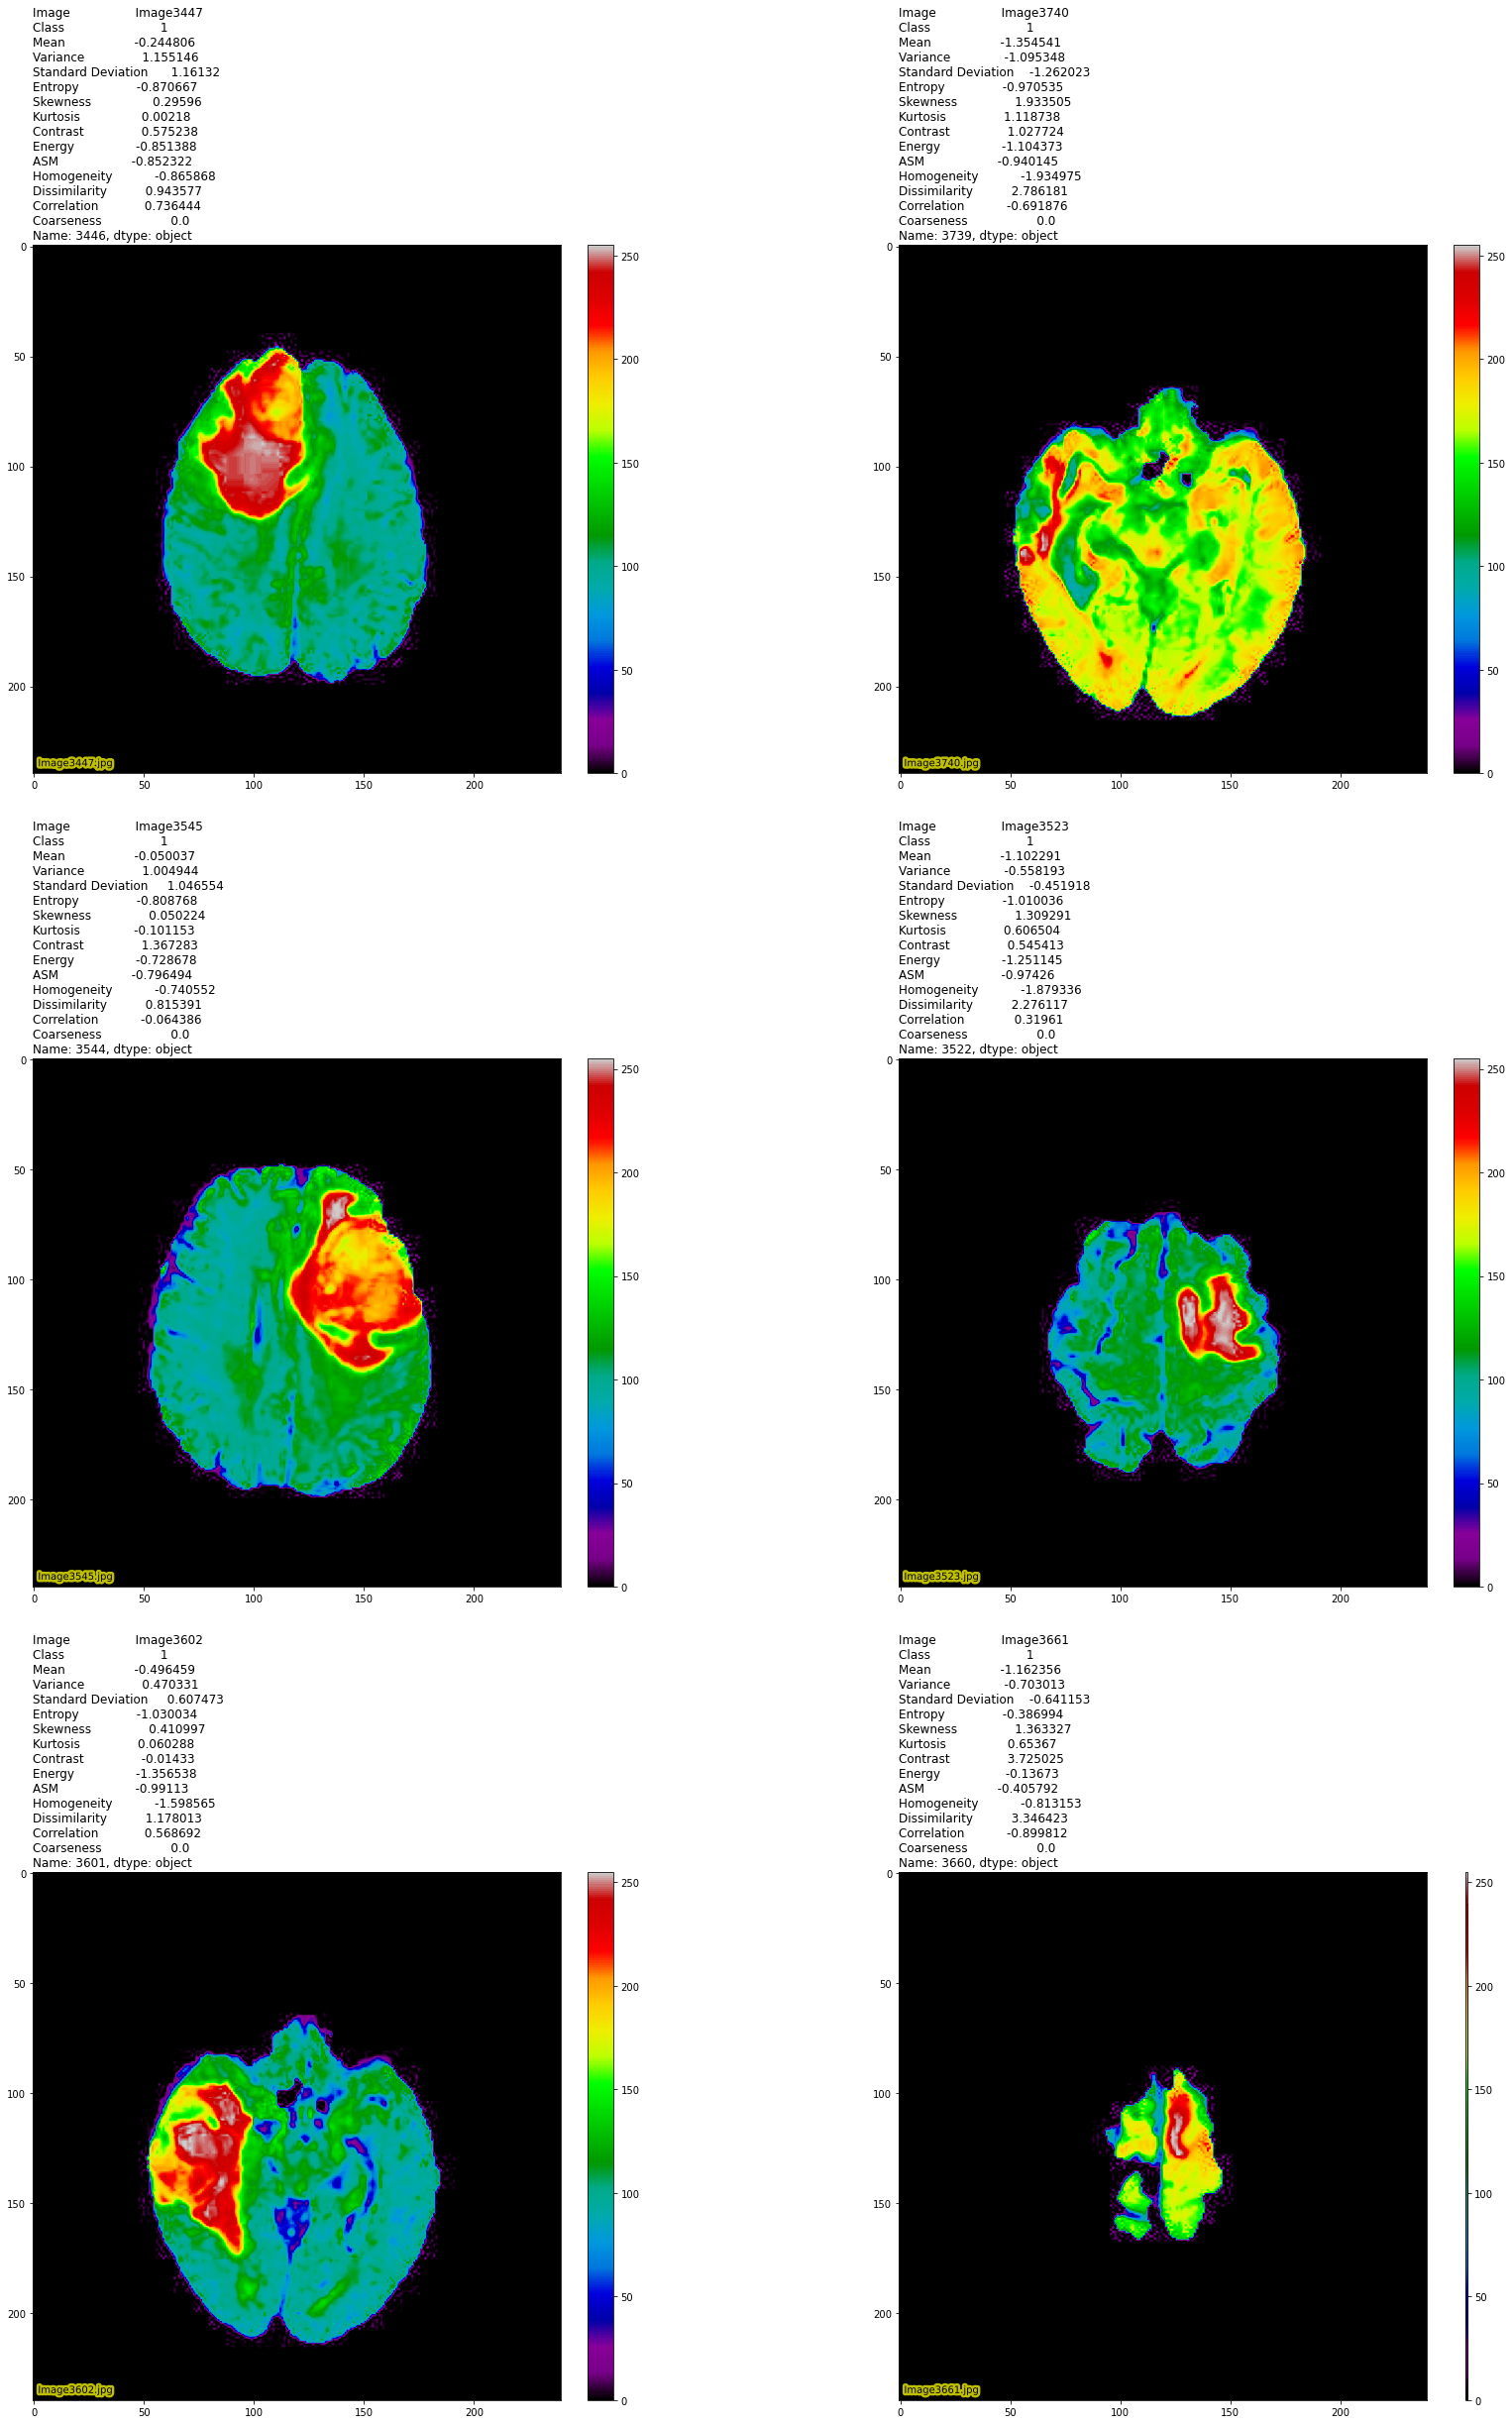

In [445]:
chooseRandomImage("_MODELLING/testing/1/")

In [446]:
import tensorflow as tf

In [590]:
training_0 = []
training_1=[]
testing_0 = []
testing_1=[]
validation_0 = []
validation_1=[]
def readImages():   
    training_path_0=base_dir+"\\_MODELLING\\training\\0\\"
    training_path_1=base_dir+"\\_MODELLING\\training\\1\\"
    testing_path_0=base_dir+"\\_MODELLING\\testing\\0\\"
    testing_path_1=base_dir+"\\_MODELLING\\testing\\1\\"
    validation_path_0=base_dir+"\\_MODELLING\\validation\\0\\"
    validation_path_1=base_dir+"\\_MODELLING\\validation\\1\\"
    
    #Read image arrays
    for img in os.listdir(training_path_0):
        training_0.append(tf.keras.utils.normalize(mpimg.imread(training_path_0+img),axis=1))
        
    for img in os.listdir(training_path_1):
        training_1.append(tf.keras.utils.normalize(mpimg.imread(training_path_1+img),axis=1))
        
    for img in os.listdir(testing_path_0):
        testing_0.append(tf.keras.utils.normalize(mpimg.imread(testing_path_0+img),axis=1))
    for img in os.listdir(testing_path_1):
        testing_1.append(tf.keras.utils.normalize(mpimg.imread(testing_path_1+img),axis=1))
        
    for img in os.listdir(validation_path_0):
        validation_0.append(tf.keras.utils.normalize(mpimg.imread(validation_path_0+img),axis=1))
    for img in os.listdir(validation_path_1):
        validation_1.append(tf.keras.utils.normalize(mpimg.imread(validation_path_1+img),axis=1))
        
readImages()

In [591]:
def prepare_data():
    x_train = np.concatenate((training_0, training_1), axis=0)
    y_train = np.concatenate((np.zeros(len(training_0)), np.ones(len(training_1))), axis=0)
    x_val = np.concatenate((validation_0, validation_1), axis=0)
    y_val = np.concatenate((np.zeros(len(validation_0)), np.ones(len(validation_1))), axis=0)
    x_test = np.concatenate((testing_0, testing_1), axis=0)
    y_test = np.concatenate((np.zeros(len(testing_0)), np.ones(len(testing_1))), axis=0)
    return x_train, y_train, x_val, y_val, x_test, y_test
x_train,y_train,x_val,y_val,x_test,y_test = prepare_data();

<h2 style="color:red">MODEL TRAINING USING KERAS SEQUENTIAL</h2>


In [592]:
from keras import utils as np_utils

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(240,240,3)),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(515, activation="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])


In [593]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0003),
            loss = 'binary_crossentropy',
            metrics=['accuracy'])

In [594]:

model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['binary_accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping( patience = 7, min_delta = 0.001,
                                               restore_best_weights =True)
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    batch_size=15,
    epochs=15,
    callbacks = [early_stopping],
    verbose=1, 
)


Epoch 1/15
201/201 [==============================] - 71s 346ms/step - loss: 0.5779 - binary_accuracy: 0.7468 - val_loss: 0.5690 - val_binary_accuracy: 0.7287
Epoch 2/15
201/201 [==============================] - 70s 346ms/step - loss: 0.4922 - binary_accuracy: 0.7730 - val_loss: 0.5835 - val_binary_accuracy: 0.7048
Epoch 3/15
201/201 [==============================] - 68s 336ms/step - loss: 0.4614 - binary_accuracy: 0.7976 - val_loss: 1.1114 - val_binary_accuracy: 0.4521
Epoch 4/15
201/201 [==============================] - 69s 343ms/step - loss: 0.4251 - binary_accuracy: 0.8082 - val_loss: 0.5859 - val_binary_accuracy: 0.6941
Epoch 5/15
201/201 [==============================] - 66s 330ms/step - loss: 0.4009 - binary_accuracy: 0.8149 - val_loss: 0.4159 - val_binary_accuracy: 0.8032
Epoch 6/15
201/201 [==============================] - 67s 333ms/step - loss: 0.3774 - binary_accuracy: 0.8119 - val_loss: 0.4818 - val_binary_accuracy: 0.7793
Epoch 7/15
201/201 [==========================

1/1 [==============================] - 0s 61ms/step


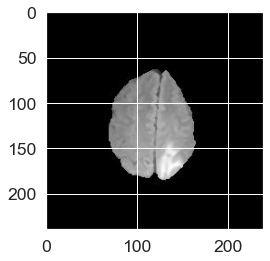

1/1 [==============================] - 0s 63ms/step
The image does not have a tumor with 78.66% confidence


In [661]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load image and preprocess
img = Image.open(base_dir+"/Brain Tumor/Brain Tumor/Image1232.jpg")
img = img.resize((240,240))
img_array = np.array(img)
img_array = img_array
img_array = np.expand_dims(img_array, axis=0)

# Make prediction
prediction = model.predict(img_array)

# Display image and prediction
plt.imshow(img)
plt.show()

prediction = model.predict(img_array)
confidence = prediction[0][0]
displayed_confidence = prediction[0][0] * 100
if confidence < 0.5:
    print("The image does not have a tumor with {:.2f}% confidence".format(100-displayed_confidence))
else:
    print("The image has a tumor with {:.2f}% confidence".format(displayed_confidence))




In [596]:
#x_train, y_train, x_val, y_val, x_test, y_test = prepare_data()
#history = model.fit(x_train, y_train, 
 #                   batch_size=32, 
  #                  epochs=10, 
   #                 validation_data=(x_val, y_val))

In [597]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


12/12 [==============================] - 1s 60ms/step - loss: 0.3493 - binary_accuracy: 0.8594
Test accuracy: 0.8594164252281189


In [598]:
validation_loss, validation_acc = model.evaluate(x_val, y_val)
print('Validation accuracy:', validation_acc)


12/12 [==============================] - 1s 60ms/step - loss: 0.3935 - binary_accuracy: 0.8617
Validation accuracy: 0.8617021441459656


In [599]:
predictions2 = model.predict(x_val)
predictions = model.predict(x_test)


12/12 [==============================] - 1s 61ms/step


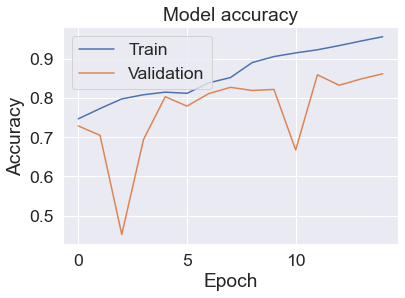

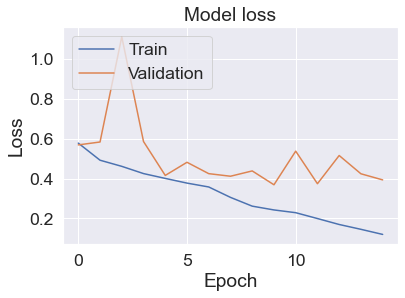

In [600]:
# Plot training & validation accuracy values
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


<h2 style="color:red">MODEL TRAINING USING PRE-TRAINED CNN MobileNetV2</h2>

In [609]:
# Reproducibility
def set_seed(seed=42):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed()

In [610]:
brain_df = pd.read_csv(base_dir+"/Brain Tumor/Brain Tumor.csv", usecols=[0,1])


In [611]:
# Get image paths to build a dictionary for data generators
path_list = []
base_path = base_dir+"/Brain Tumor/Brain Tumor"
for entry in os.listdir(base_path):
    path_list.append(os.path.join(base_path, entry))

In [612]:
# Create path dictionary and map it to brain_df['paths']
paths_dict = {os.path.splitext(os.path.basename(x))[0]: x for x in path_list}
brain_df['Path'] = brain_df['Image'].map(paths_dict.get)
brain_df.head()

,Image,Class,Path
0,Image1,0,C:\Users\gorke\AI PROJECT/Brain Tumor/Brain Tu...
1,Image2,0,C:\Users\gorke\AI PROJECT/Brain Tumor/Brain Tu...
2,Image3,1,C:\Users\gorke\AI PROJECT/Brain Tumor/Brain Tu...
3,Image4,1,C:\Users\gorke\AI PROJECT/Brain Tumor/Brain Tu...
4,Image5,0,C:\Users\gorke\AI PROJECT/Brain Tumor/Brain Tu...


In [613]:
# Split brain_df into test and train lists for data generators
brain_df['split'] = np.random.randn(brain_df.shape[0], 1)

msk = np.random.rand(len(brain_df)) <= 0.8

train_df = brain_df[msk]
test_df = brain_df[~msk]
train_df.to_csv('brain_tumor_train.csv', index=False)
test_df.to_csv('brain_tumor_test.csv', index=False)
train_list = train_df.values.tolist()
test_list = test_df.values.tolist()

In [614]:
from random import shuffle
import cv2
def generator(samples, batch_size=32,shuffle_data=True):
    """
    Yields the next training batch.
    Suppose `samples` is an array [[image1_filename,label1], [image2_filename,label2],...].
    """
    num_samples = len(samples)
    while True: # Loop forever so the generator never terminates
        shuffle(samples)

        # Get index to start each batch: [0, batch_size, 2*batch_size, ..., max multiple of batch_size <= num_samples]
        for offset in range(0, num_samples, batch_size):
            # Get the samples you'll use in this batch
            batch_samples = samples[offset:offset+batch_size]

            # Initialise X_train and y_train arrays for this batch
            X_train = []
            y_train = []

            # For each example
            for batch_sample in batch_samples:
                # Load image (X) and label (y)
                label = batch_sample[1]
                img_path = batch_sample[2]
                img =  cv2.imread(img_path)
                
                # apply any kind of preprocessing
                # img = cv2.resize(img,(resize,resize))
                img = img.astype(np.float32)
                # Add example to arrays
                X_train.append(keras.applications.nasnet.preprocess_input(img))
                y_train.append(label)

            # Make sure they're numpy arrays (as opposed to lists)
            X_train = np.array(X_train)
            y_train = np.array(y_train)

            # The generator-y part: yield the next training batch            
            yield X_train, y_train

In [615]:
# Create test and train generators
train_generator = generator(train_list)
test_generator = generator(test_list)


In [616]:
import tensorflow.keras.layers as layers # model building
from tensorflow.keras.applications import MobileNetV2

model = tf.keras.Sequential([
    # base
    MobileNetV2(input_shape=(224, 224, 3),include_top=False, weights='imagenet'),
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.2),
    layers.Dense(units=1, activation='sigmoid',name='preds'),   
])
model.layers[0].trainable= False
# show model summary
model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_21  (None, 1280)             0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_31 (Dropout)        (None, 1280)              0         
                                                                 
 preds (Dense)               (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [617]:
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    metrics=['binary_accuracy']
)

In [618]:
# Set parameters for model training
batch_size = 32
train_size = len(train_list)
test_size = len(test_list)
steps_per_epoch = train_size//batch_size
validation_steps = test_size//batch_size

In [619]:
# Use early stopping to cut resource wasting
early_stopping = keras.callbacks.EarlyStopping(
    patience=15,
    min_delta=0.001,
    restore_best_weights=True,
)
from tensorflow.keras.callbacks import ModelCheckpoint
filepath="mobilenetv2best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_binary_accuracy', verbose=1, save_best_only=True, mode='max')

In [620]:
# Train the model
history = model.fit_generator(
    train_generator,
    steps_per_epoch = steps_per_epoch,
    epochs=90,
    validation_data=test_generator,
    validation_steps = validation_steps,
    verbose=1,
    callbacks = [checkpoint]
)

Epoch 1/90


C:\Users\gorke\AppData\Local\Temp\ipykernel_17368\2330791983.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


94/94 [==============================] - ETA: 0s - loss: 0.5503 - binary_accuracy: 0.7281
Epoch 1: val_binary_accuracy improved from -inf to 0.81658, saving model to mobilenetv2best.hdf5
94/94 [==============================] - 60s 590ms/step - loss: 0.5503 - binary_accuracy: 0.7281 - val_loss: 0.4204 - val_binary_accuracy: 0.8166
Epoch 2/90
94/94 [==============================] - ETA: 0s - loss: 0.3991 - binary_accuracy: 0.8336
Epoch 2: val_binary_accuracy improved from 0.81658 to 0.87636, saving model to mobilenetv2best.hdf5
94/94 [==============================] - 53s 567ms/step - loss: 0.3991 - binary_accuracy: 0.8336 - val_loss: 0.3233 - val_binary_accuracy: 0.8764
Epoch 3/90
94/94 [==============================] - ETA: 0s - loss: 0.3480 - binary_accuracy: 0.8529
Epoch 3: val_binary_accuracy improved from 0.87636 to 0.88859, saving model to mobilenetv2best.hdf5
94/94 [==============================] - 54s 571ms/step - loss: 0.3480 - binary_accuracy: 0.8529 - val_loss: 0.2933 - v

94/94 [==============================] - 53s 567ms/step - loss: 0.1921 - binary_accuracy: 0.9245 - val_loss: 0.1883 - val_binary_accuracy: 0.9307
Epoch 27/90
94/94 [==============================] - ETA: 0s - loss: 0.1981 - binary_accuracy: 0.9221
Epoch 27: val_binary_accuracy did not improve from 0.93071
94/94 [==============================] - 52s 552ms/step - loss: 0.1981 - binary_accuracy: 0.9221 - val_loss: 0.2131 - val_binary_accuracy: 0.9076
Epoch 28/90
94/94 [==============================] - ETA: 0s - loss: 0.1995 - binary_accuracy: 0.9198
Epoch 28: val_binary_accuracy did not improve from 0.93071
94/94 [==============================] - 52s 551ms/step - loss: 0.1995 - binary_accuracy: 0.9198 - val_loss: 0.1962 - val_binary_accuracy: 0.9253
Epoch 29/90
94/94 [==============================] - ETA: 0s - loss: 0.1923 - binary_accuracy: 0.9235
Epoch 29: val_binary_accuracy did not improve from 0.93071
94/94 [==============================] - 52s 550ms/step - loss: 0.1923 - binary

Epoch 53/90
94/94 [==============================] - ETA: 0s - loss: 0.1726 - binary_accuracy: 0.9315
Epoch 53: val_binary_accuracy did not improve from 0.93886
94/94 [==============================] - 52s 555ms/step - loss: 0.1726 - binary_accuracy: 0.9315 - val_loss: 0.1858 - val_binary_accuracy: 0.9266
Epoch 54/90
94/94 [==============================] - ETA: 0s - loss: 0.1666 - binary_accuracy: 0.9315
Epoch 54: val_binary_accuracy did not improve from 0.93886
94/94 [==============================] - 52s 553ms/step - loss: 0.1666 - binary_accuracy: 0.9315 - val_loss: 0.1850 - val_binary_accuracy: 0.9280
Epoch 55/90
94/94 [==============================] - ETA: 0s - loss: 0.1804 - binary_accuracy: 0.9265
Epoch 55: val_binary_accuracy did not improve from 0.93886
94/94 [==============================] - 52s 551ms/step - loss: 0.1804 - binary_accuracy: 0.9265 - val_loss: 0.1749 - val_binary_accuracy: 0.9375
Epoch 56/90
94/94 [==============================] - ETA: 0s - loss: 0.1651 - b

Epoch 80/90
94/94 [==============================] - ETA: 0s - loss: 0.1643 - binary_accuracy: 0.9315
Epoch 80: val_binary_accuracy did not improve from 0.94293
94/94 [==============================] - 52s 551ms/step - loss: 0.1643 - binary_accuracy: 0.9315 - val_loss: 0.1767 - val_binary_accuracy: 0.9334
Epoch 81/90
94/94 [==============================] - ETA: 0s - loss: 0.1727 - binary_accuracy: 0.9308
Epoch 81: val_binary_accuracy did not improve from 0.94293
94/94 [==============================] - 52s 556ms/step - loss: 0.1727 - binary_accuracy: 0.9308 - val_loss: 0.1810 - val_binary_accuracy: 0.9293
Epoch 82/90
94/94 [==============================] - ETA: 0s - loss: 0.1690 - binary_accuracy: 0.9348
Epoch 82: val_binary_accuracy did not improve from 0.94293
94/94 [==============================] - 53s 563ms/step - loss: 0.1690 - binary_accuracy: 0.9348 - val_loss: 0.1768 - val_binary_accuracy: 0.9348
Epoch 83/90
94/94 [==============================] - ETA: 0s - loss: 0.1536 - b

<h3 style="color:crimson">SAVING MODEL USING PICKLE</h5>

In [622]:
import pickle
# Save the model to a file
with open('gorkem_KARAMOLLA_1_RF.mdl', 'wb') as file:
    pickle.dump(model, file)


Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dropout
......vars
...layers\functional
......vars
...layers\functional\layers\add
......vars
...layers\functional\layers\add_1
......vars
...layers\functional\layers\add_2
......vars
...layers\functional\layers\add_3
......vars
...layers\functional\layers\add_4
......vars
...layers\functional\layers\add_5
......vars
...layers\functional\layers\add_6
......vars
...layers\functional\layers\add_7
......vars
...layers\functional\layers\add_8
......vars
...layers\functional\layers\add_9
......vars
...layers\functional\layers\batch_normalization
......vars
.........0
.........1
.........2
.........3
...layers\functional\layers\batch_normalization_1
......vars
.........0
.........1
.........2
.........3
...layers\functional\layers\batch_normalization_10
......vars
.........0
.........1
.........2
.........3
...layers\functional\layers\batch_normalization_11
......vars


File Name                                             Modified             Size
config.json                                    2023-01-20 21:07:25        89312
metadata.json                                  2023-01-20 21:07:25           64
variables.h5                                   2023-01-20 21:07:26      9465856


<h3 style="color:crimson">Validation Accuracy / Validation Loss</h5>

Best Validation Loss: 0.1698
Best Validation Accuracy: 0.9429


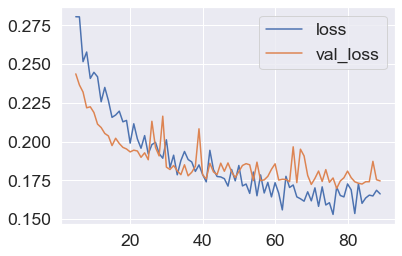

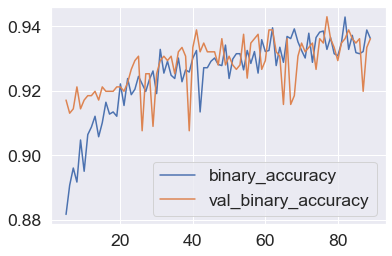

In [623]:
# Graph loss and binary accuracy graphs
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))

<h3 style="color:crimson">Evaluation Accuracy & Loss</h5>

In [624]:
pretrained_cnn = model
print(pretrained_cnn)
eval_score = pretrained_cnn.evaluate(test_generator, steps = validation_steps)
print('Eval loss:',eval_score[0])
print('Eval accuracy:',eval_score[1])

23/23 [==============================] - 10s 448ms/step - loss: 0.1719 - binary_accuracy: 0.9375
Eval loss: 0.17194533348083496
Eval accuracy: 0.9375


<h3 style="color:crimson">Confusion Matrix and Classification Matrix using scikit-learn</h5>

In [625]:
from sklearn.metrics import confusion_matrix , classification_report
y_pred = np.rint(pretrained_cnn.predict_generator(test_generator, steps = validation_steps)).astype(int)
y_test = [i[1] for i in test_list[0:-2]]
target_classes = ['No Tumor','Tumor']

classification_report(y_test , y_pred , output_dict = True
                      , target_names=target_classes)

C:\Users\gorke\AppData\Local\Temp\ipykernel_17368\802132294.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = np.rint(pretrained_cnn.predict_generator(test_generator, steps = validation_steps)).astype(int)


{'No Tumor': {'precision': 0.9300699300699301,
  'recall': 0.9614457831325302,
  'f1-score': 0.9454976303317536,
  'support': 415},
 'Tumor': {'precision': 0.9478827361563518,
  'recall': 0.9065420560747663,
  'f1-score': 0.9267515923566879,
  'support': 321},
 'accuracy': 0.9375,
 'macro avg': {'precision': 0.9389763331131409,
  'recall': 0.9339939196036482,
  'f1-score': 0.9361246113442208,
  'support': 736},
 'weighted avg': {'precision': 0.937838830550557,
  'recall': 0.9375,
  'f1-score': 0.9373217088779546,
  'support': 736}}

In [650]:
cm = confusion_matrix(y_test , y_pred ) 

<h2 style="color:crimson">Showing  Confusion Matrix</h5>

<h3 style="color:crimson">Showing F1, MCC, Recall, and Precision  </h5>

In [647]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import matthews_corrcoef

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=False,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            mcc = matthews_corrcoef(y_test, y_pred)
            
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f} \nMCC={:0.3f}".format(
                accuracy,precision,recall,f1_score,mcc)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.set(font_scale=1.6)

    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

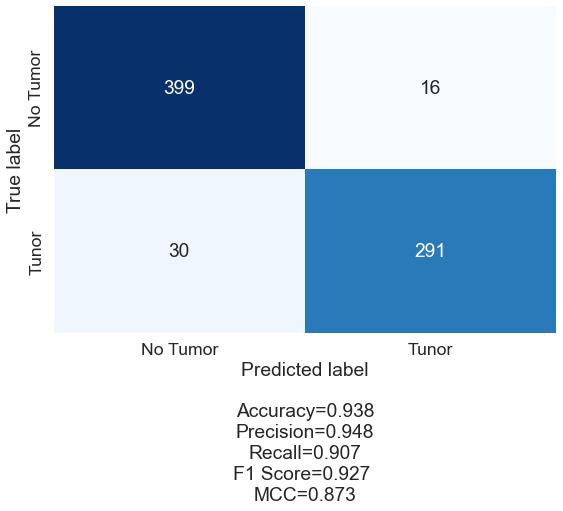

In [648]:
categories = ["No Tumor", "Tunor"]
make_confusion_matrix(cm, figsize=(9,6), cbar=False,categories=categories)

1/1 [==============================] - 0s 59ms/step


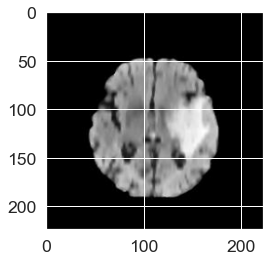

1/1 [==============================] - 0s 60ms/step
The image does not have a tumor with 98.14% confidence


In [659]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load image and preprocess
img = Image.open(base_dir+"/Brain Tumor/Brain Tumor/Image3.jpg")
img = img.resize((224,224))
img_array = np.array(img)
img_array = img_array
img_array = np.expand_dims(img_array, axis=0)

# Make prediction
prediction = model.predict(img_array)

# Display image and prediction
plt.imshow(img)
plt.show()

prediction = model.predict(img_array)
confidence = prediction[0][0]
displayed_confidence = prediction[0][0] * 100

if confidence < 0.5:
    print("The image does not have a tumor with {:.2f}% confidence".format(100-displayed_confidence))
else:
    print("The image has a tumor with {:.2f}% confidence".format(displayed_confidence))

   


<h3 style="color:crimson"> ROC CURVE AND PRECISION RECALL CURVE </h3>

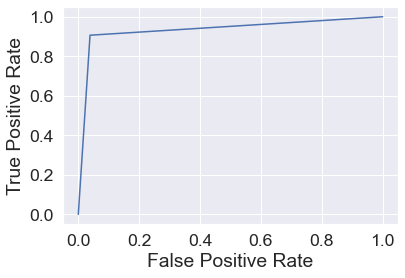

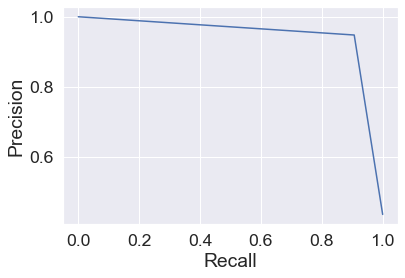

In [665]:
from sklearn.metrics import roc_curve, precision_recall_curve
import matplotlib.pyplot as plt

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# Compute the Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Plot the Precision-Recall curve
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()
